### Importing Libraries

In [ ]:
!pip install ultralytics
from ultralytics import YOLO
import os
import cv2
import numpy as np
from matplotlib import pyplot as plt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 16.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 88.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 77.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 42.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 889.7 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 81.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling

In [ ]:
# Connect to Google Drive
from google.colab import drive
drive.mount('/content/drive')

### Training YOLO V8

In [ ]:
# Load YOLOv8n (nano) model
model = YOLO('yolov8n.pt')

# Train on your dataset
model.train(
    data="/content/drive/MyDrive/Gender/gender_detection/data.yaml",
    epochs=50,
    imgsz=640,
    project="/content/drive/MyDrive/Gender",
    name="yolov8n_train"
)

### Evaluating Performance

Ultralytics 8.3.162 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
val: Fast image access ✅ (ping: 0.4±0.2 ms, read: 13.4±7.1 MB/s, size: 25.3 KB)


val: Scanning /content/drive/.shortcut-targets-by-id/1ePWia4RUfvl2zW6b5euC90mXTcv9kDGc/gender_detection/labels/val.cache... 917 images, 0 backgrounds, 0 corrupt: 100%|██████████| 917/917 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 58/58 [00:11<00:00,  4.94it/s]


                   all        917        966      0.942      0.891      0.916      0.825
                  male        479        510      0.943      0.865      0.909      0.817
                female        438        456       0.94      0.917      0.923      0.832
Speed: 0.8ms preprocess, 3.6ms inference, 0.0ms loss, 2.0ms postprocess per image
Results saved to /content/drive/MyDrive/Gender/yolov8n_train53
0.8247404643598367
0.9159619498295152
0.855777902238959


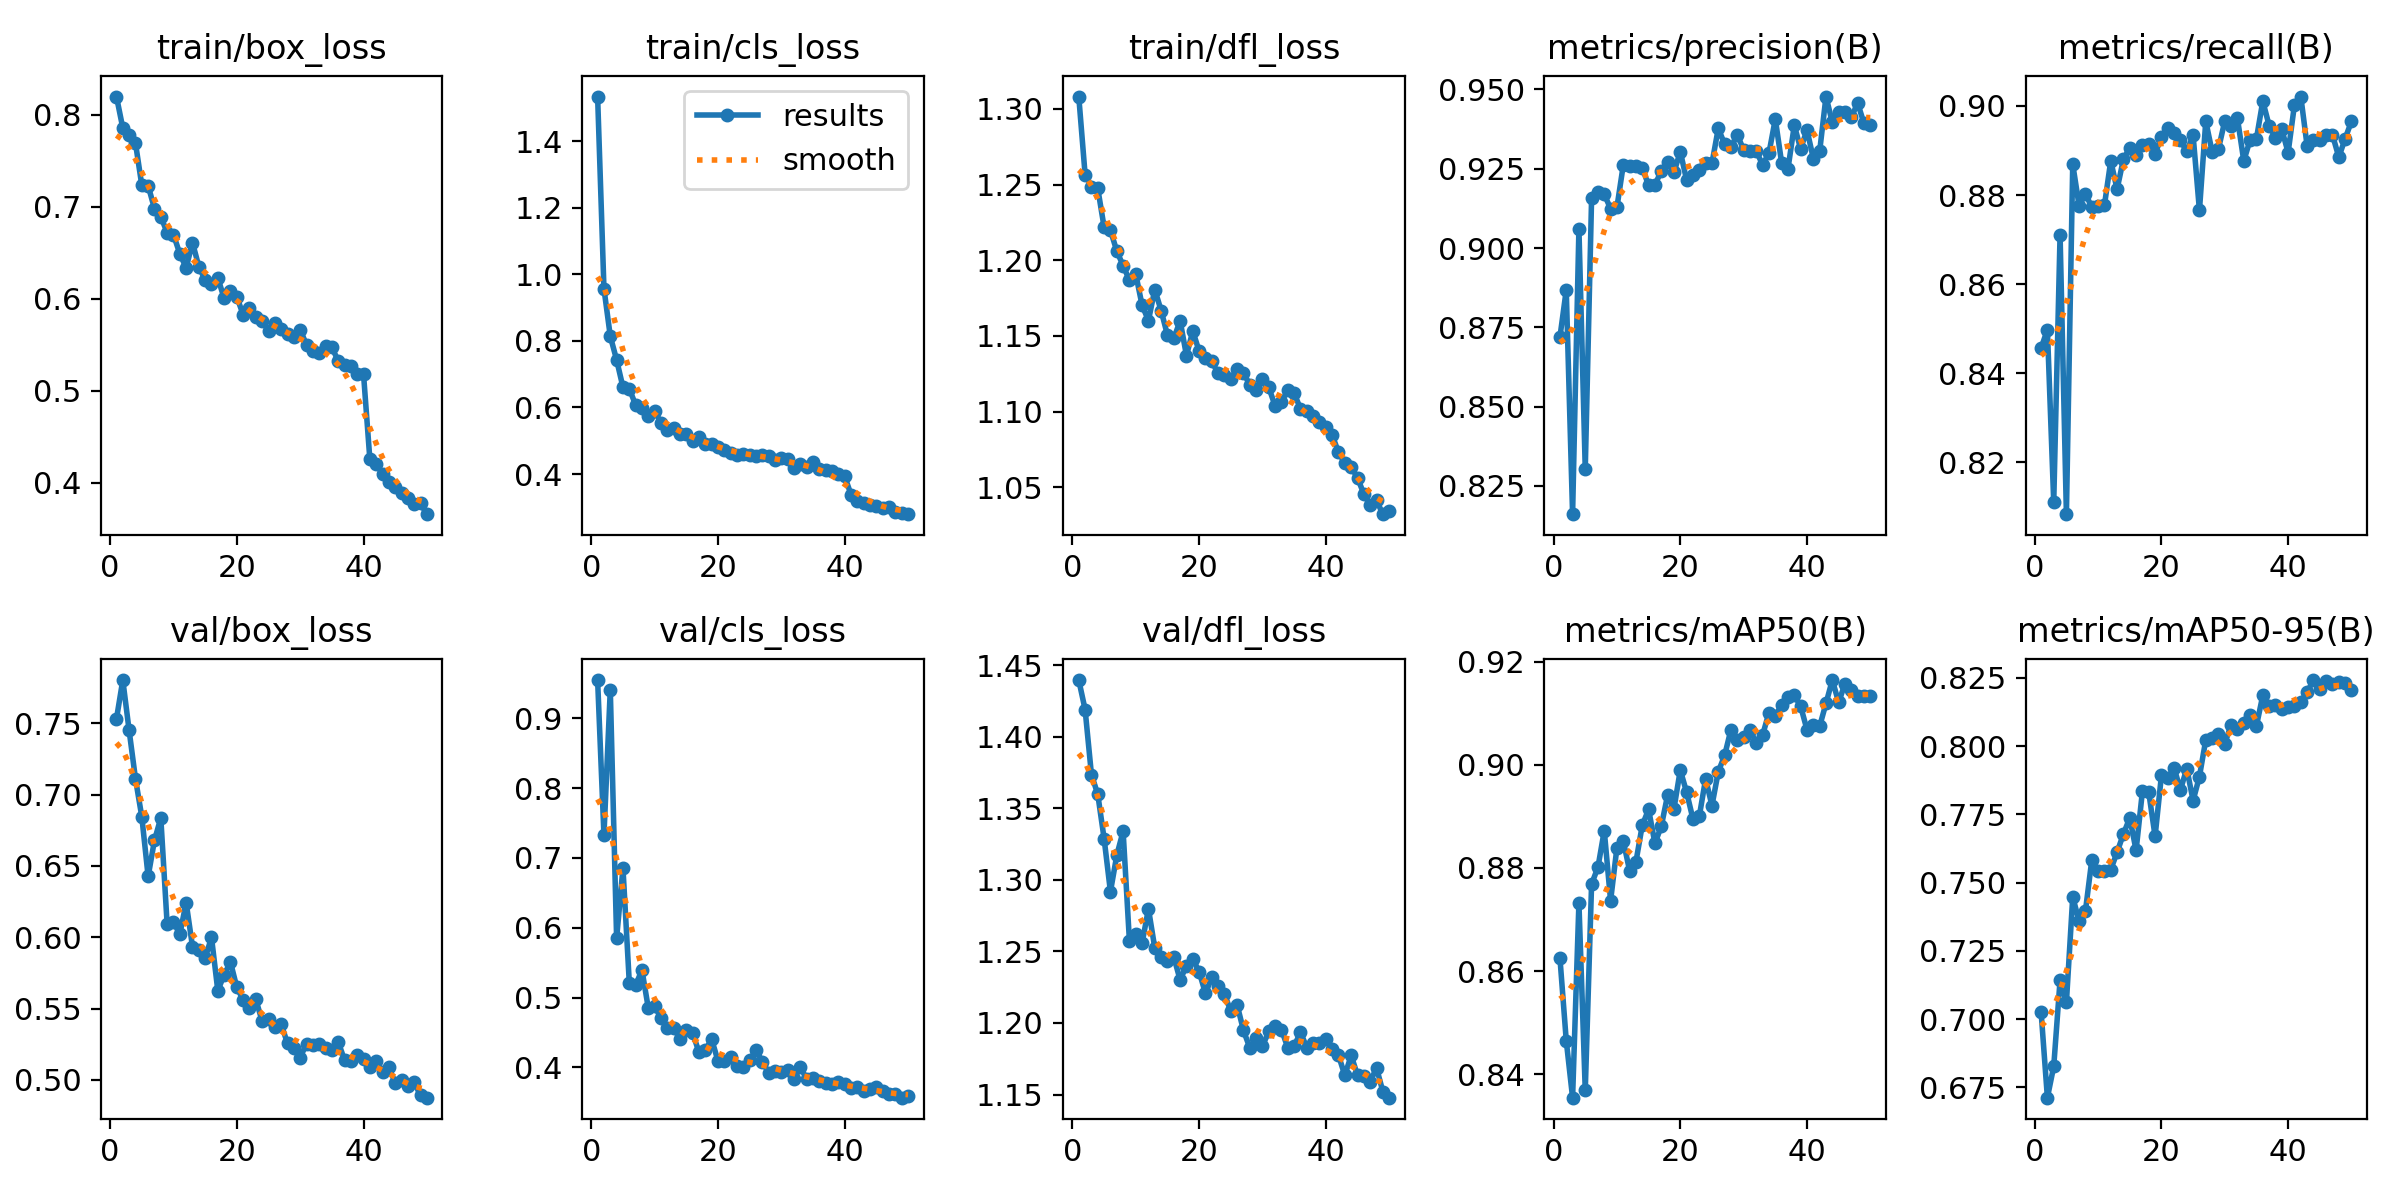

In [ ]:
# Evaluate model performance
metrics = model.val()
print(metrics.box.map)  # mAP50-95
print(metrics.box.map50)  # mAP50
print(metrics.box.map75)  # mAP75

# Plot training results
from IPython.display import Image
Image(filename='/content/drive/MyDrive/Gender/yolov8n_train5/results.png', width=1000)

### Testing Model


image 1/1 /content/drive/MyDrive/Gender/gender_detection/images/val/Others (1340).jpg: 640x544 1 male, 23.7ms
Speed: 4.0ms preprocess, 23.7ms inference, 4.8ms postprocess per image at shape (1, 3, 640, 544)


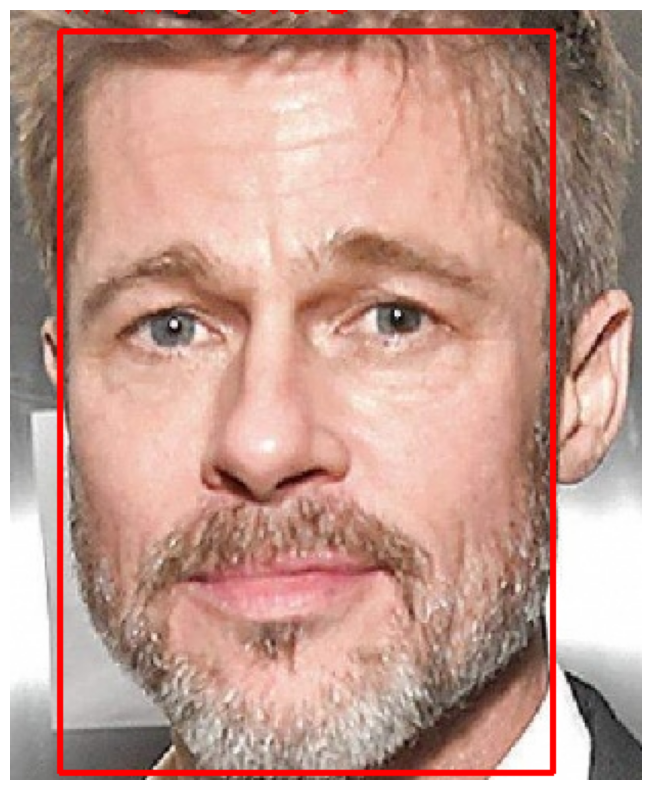


image 1/1 /content/drive/MyDrive/Gender/gender_detection/images/val/Others (751).jpg: 640x352 1 male, 44.6ms
Speed: 2.6ms preprocess, 44.6ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 352)


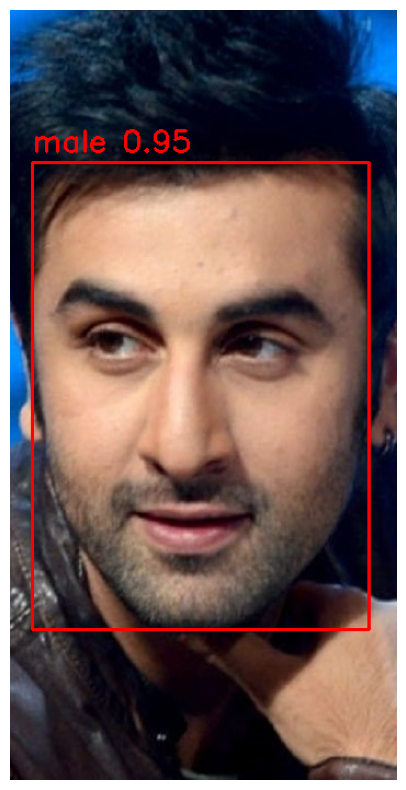


image 1/1 /content/drive/MyDrive/Gender/gender_detection/images/val/Others (577).jpg: 640x512 1 male, 39.7ms
Speed: 7.4ms preprocess, 39.7ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 512)


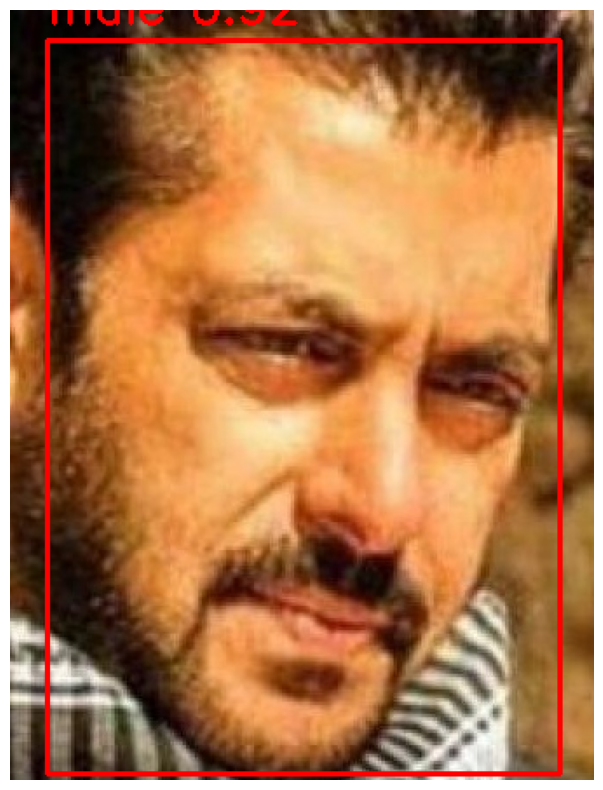


image 1/1 /content/drive/MyDrive/Gender/gender_detection/images/val/Others (1298).jpg: 640x416 1 male, 38.0ms
Speed: 2.9ms preprocess, 38.0ms inference, 6.3ms postprocess per image at shape (1, 3, 640, 416)


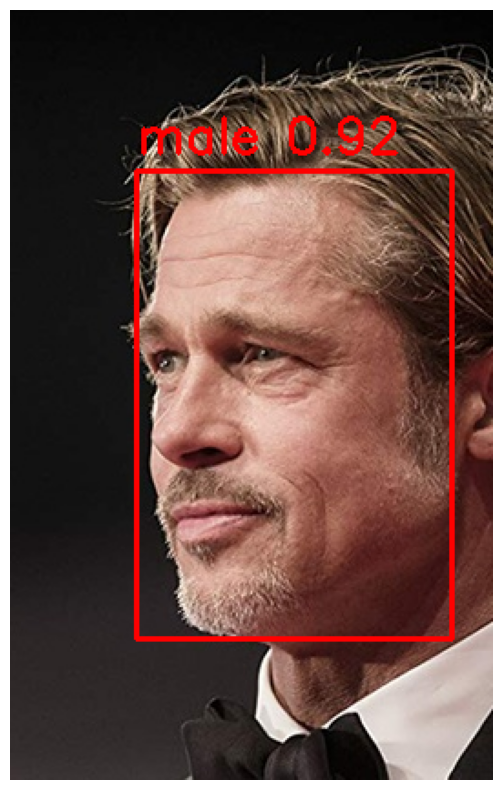


image 1/1 /content/drive/MyDrive/Gender/gender_detection/images/val/Others (2094).jpg: 640x640 2 females, 19.6ms
Speed: 3.8ms preprocess, 19.6ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


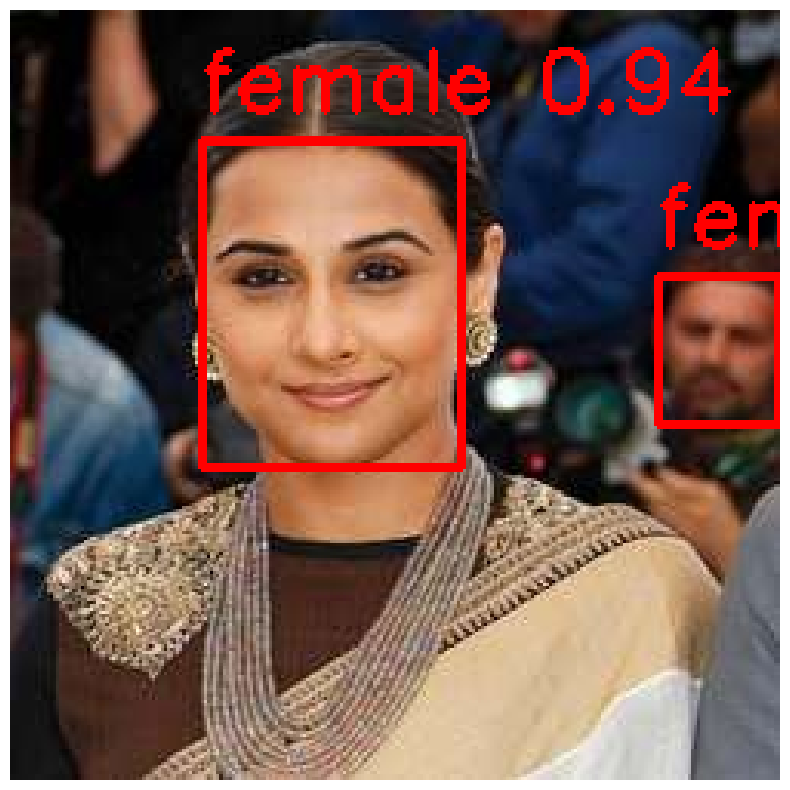

In [ ]:
# Load trained YOLOv8 model
best_model = YOLO('/content/drive/MyDrive/Gender/yolov8n_train5/weights/best.pt')

# Your class names (you can load from yaml if needed)
class_names = ['male', 'female']  # or use data_config['names'] if already defined

# Display function
def display_results(image_path, results):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    for result in results:
        for box in result.boxes:
            x1, y1, x2, y2 = map(int, box.xyxy[0])
            conf = box.conf[0]
            cls = int(box.cls[0])
            label = f"{class_names[cls]} {conf:.2f}"
            cv2.rectangle(img, (x1, y1), (x2, y2), (255, 0, 0), 2)
            cv2.putText(img, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)

    plt.figure(figsize=(10, 10))
    plt.imshow(img)
    plt.axis('off')
    plt.show()

# Test on 5 images from val folder
val_img_path = '/content/drive/MyDrive/Gender/gender_detection/images/val'
test_images = [f for f in os.listdir(val_img_path) if f.endswith(('.jpg', '.png'))][:5]

for img_name in test_images:
    img_path = os.path.join(val_img_path, img_name)
    results = best_model(img_path)
    display_results(img_path, results)


In [ ]:
def detect_gender(image_path, model_path='/content/drive/MyDrive/Gender/yolov8n_train5/weights/best.pt', conf_threshold=0.5):

    # Class names (replace with actual if different)
    class_names = ['male', 'female']

    # Load model
    model = YOLO(model_path)

    # Run inference
    results = model(image_path)

    # Process results
    detections = []
    for result in results:
        for box in result.boxes:
            x1, y1, x2, y2 = map(int, box.xyxy[0])
            conf = float(box.conf[0])
            cls = int(box.cls[0])

            if conf >= conf_threshold:
                detections.append({
                    'bbox': [x1, y1, x2, y2],
                    'confidence': conf,
                    'class': class_names[cls],
                    'gender': class_names[cls]  # same as class
                })

    return {
        'image_path': image_path,
        'detections': detections,
        'total_detections': len(detections)
    }

# Example usage
result = detect_gender('/content/drive/MyDrive/Gender/gender_detection/images/val/Others (1340).jpg')
print(result)



image 1/1 /content/drive/MyDrive/Gender/gender_detection/images/val/Others (1340).jpg: 640x544 1 male, 33.1ms
Speed: 3.3ms preprocess, 33.1ms inference, 2.8ms postprocess per image at shape (1, 3, 640, 544)
{'image_path': '/content/drive/MyDrive/Gender/gender_detection/images/val/Others (1340).jpg', 'detections': [{'bbox': [24, 10, 265, 373], 'confidence': 0.9277644753456116, 'class': 'male', 'gender': 'male'}], 'total_detections': 1}


In [ ]:
# ---------- Configuration ----------
IMAGE_PATH = 'test_images/sample.jpg'  # <<< CHANGE THIS to your image path
MODEL_PATH = 'gender_detection/yolov10_train/weights/best.pt'  # your trained YOLOv10 model path
CONFIDENCE_THRESHOLD = 0.5
OUTPUT_PATH = 'result.jpg'  # Output image path

# ---------- Load the YOLOv10 Model ----------
model = YOLO(MODEL_PATH)

# ---------- Load the Image ----------
image = cv2.imread(IMAGE_PATH)
if image is None:
    raise ValueError(f"Image not found at {IMAGE_PATH}")

# ---------- Perform Detection ----------
results = model(image)[0]

# ---------- Process Detections ----------
for box in results.boxes:
    conf = float(box.conf[0])
    if conf < CONFIDENCE_THRESHOLD:
        continue

    # Bounding box coordinates
    x1, y1, x2, y2 = map(int, box.xyxy[0])

    # Class: 0 = Male, 1 = Female
    cls_id = int(box.cls[0])
    label = 'Male' if cls_id == 0 else 'Female'
    color = (255, 0, 0) if cls_id == 0 else (0, 255, 0)  # Blue for Male, Green for Female

    # Draw bounding box and label
    cv2.rectangle(image, (x1, y1), (x2, y2), color, 2)
    cv2.putText(image, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, color, 2)

    # Optional: Crop and save face
    face_crop = image[y1:y2, x1:x2]
    face_filename = f"face_crop_{label}_{x1}_{y1}.jpg"
    cv2.imwrite(face_filename, face_crop)

# ---------- Save Final Image ----------
cv2.imwrite(OUTPUT_PATH, image)
print(f"[✓] Detection completed. Result saved to: {OUTPUT_PATH}")
